Based on June 2018 version of [Sarcasm in News Headlines Dataset by Rishabh Misra](https://rishabhmisra.github.io/publications/) 

In [ ]:
# get data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O ../tmp/sarcasm.json

In [1]:
# load data
import json

with open("../tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [2]:
# encode
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print('number of words in index', len(word_index))
print('word_index')
print(list(word_index.keys())[:10])
print(list(word_index.values())[:10])


number of words in index 29657
word_index
['<OOV>', 'to', 'of', 'the', 'in', 'for', 'a', 'on', 'and', 'with']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[:2])
print(padded.shape, '(# sentences, max len of sentence)') 
print('labels')
print(labels[:10], len(labels))

[[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    4  8435  3338  2746    22     2   166  8436   416  3112     6   258
      9  1002     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]
(26709, 40) (# sentences, max len of sentence)
labels
[0, 0, 1, 1, 0, 0, 0, 0, 1, 0] 26709


## Train naive FNN to predict sarcasm

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sl_util import keras_util as u # plot_history

x_train = padded / 29657
y_train = np.array(labels)

In [32]:
model = Sequential([
    Dense(40, activation=tf.nn.relu, input_shape=(40,)),
    Dropout(0.3),
    Dense(250, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(150, activation=tf.nn.relu),
    Dropout(0.1),
    Dense(1, activation=tf.nn.sigmoid),
    ])
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_17 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 250)               10250     
_________________________________________________________________
dropout_18 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 150)               37650     
_________________________________________________________________
dropout_19 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                

In [33]:
history = model.fit(
    x_train, y_train, shuffle=True, batch_size=500, validation_split=0.1
    , epochs=100, verbose=0
#     ,callbacks=[tf.keras.callbacks.callbacks.EarlyStopping()]
)

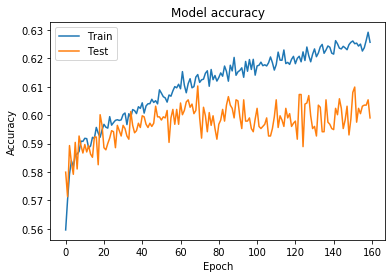

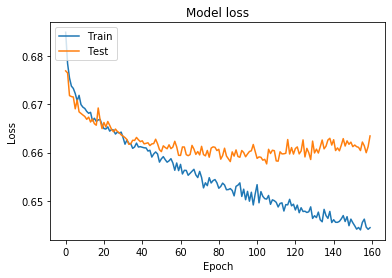

In [34]:
u.plot_history2(history)